Importanto bibliotecas

In [55]:
import dataprocessing.datacolect as dc
from time import sleep
import pandas as pd

# 1. Coleta de dados do IBGE

Para o enriquecimento da análise de dados e entender o comportanto do eleitor do estado do Ceará na eleição de 2022, uma coleta de dados no site do IBGE pode ser feita. Na página https://cidades.ibge.gov.br/brasil/ce/panorama é possível ter um panorama do estado.

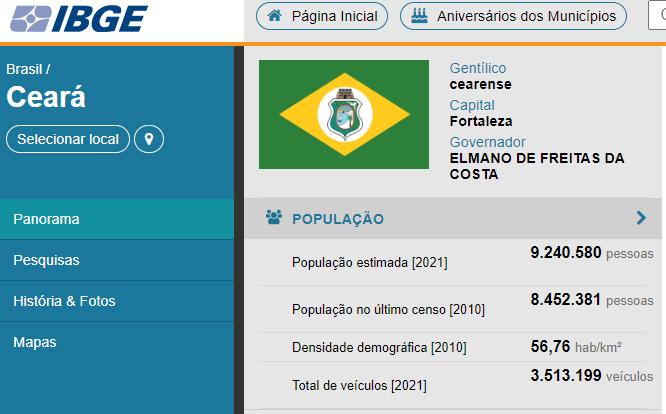

Além disso, é possível gerar um resumo ao rolar a página, como mostrado na imagem:

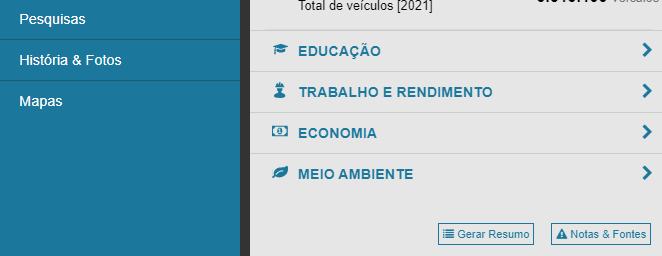

Portanto, uma automação com a realização de *web scraping* é capaz de coletar informações importantes para a análise.

# 2. Automação e *web scraping*

## 2.1 Preparação para abertura do *browser*

A *url* da página é instanciada numa variável:

In [56]:
url = 'https://cidades.ibge.gov.br/brasil/ce/panorama'

In [57]:
webdriver = dc.Webdriver(url)

In [58]:
browser = webdriver.set_driver()

In [59]:
browser.get(url)

## 2.2 Seleção dos indicadores desejados

In [60]:
scrape = dc.Scrape(browser)

A automação deve clicar no botão para gerar um resumo:

In [64]:
resume_button = scrape.get_element(path= '//i[@class= "fa fa-list"]')
resume_button.click()

Uma janela na mesma página é abertar com os indicadores disponíveis. É possível escolher apenas seis para gerar o resumo.

In [65]:
indicators = scrape.get_elements(path= '//div[@class= "modal_resumo_indicador"]//label')

O método `elements_text` mostra os textos de cada um dos objetos `WebElement` do Selenium que foram obtidos:

In [66]:
scrape.elements_text(indicators)

0: População estimada [2021]
1: População no último censo [2010]
2: Densidade demográfica [2010]
3: Salário médio mensal dos trabalhadores formais [2020]
4: Pessoal ocupado [2020]
5: População ocupada [2020]
6: Percentual da população com rendimento nominal mensal per capita de até 1/2 salário mínimo [2010]
7: Taxa de escolarização de 6 a 14 anos de idade [2010]
8: IDEB – Anos iniciais do ensino fundamental (Rede pública) [2021]
9: IDEB – Anos finais do ensino fundamental (Rede pública) [2021]
10: Matrículas no ensino fundamental [2021]
11: Matrículas no ensino médio [2021]
12: Docentes no ensino fundamental [2021]
13: Docentes no ensino médio [2021]
14: Número de estabelecimentos de ensino fundamental [2021]
15: Número de estabelecimentos de ensino médio [2021]
16: PIB per capita [2020]
17: Percentual das receitas oriundas de fontes externas [2015]
18: Índice de Desenvolvimento Humano Municipal (IDHM) [2010]
19: Total de receitas realizadas [2017]
20: Total de despesas empenhadas [201

Para a análise, os indicadores de interesse são: população estimada, PIB per capita, índice de desenvolvimento humano municipal (IDHM), área urbanizada e área da unidade territoral. Portanto, selecionam-se os indicadores utilizando o método `select_elements` passando os indicadores e os índices em que foram mostrados acima:

In [67]:
selected_indicators = scrape.select_elements(
    elements= indicators,
    index= [0, 16, 18, 24, 31]
)

[0, 16, 18, 24, 31]


É feita a ação de clique nos indicadores.

In [68]:
for selected in selected_indicators:
    selected.click()

E o relatório é gerado:

In [69]:
scrape.get_element(path= '//button[@class= "gerar_relatorio"]').click()

# 3. *Scraping* dos dados do relatório

Uma nova aba é aberta no navegador. Utiliza-se o método `switch_tab` para coleta dos dados.

In [70]:
scrape.switch_tab(tab= 1)

As informações dos municípios estão localizados na tag `tbody`:

In [71]:
municipios = scrape.get_elements(path= '//tbody')

In [73]:
data_city = dict()
data_cities = list()

In [84]:
for municipio in municipios:
    data = municipio.text
    print(data)
#     data_city['nome'] = data[0]
#     data_city['area_territorio'] = data[2]
#     data_city['populacao'] = data[4]
#     data_city['IDHM'] = data[6]
#     data_city['renda_per_capita'] = data[7]
#     data_city['area_urbanizada'] = data[-2]
#     data_cities.append(data_city.copy())

# print(data_cities)


Abaiara cearense 180,833 km² 11965 pessoas 0,628 9158,04 R$ 3,19 km²
Acarape cearense 130,002 km² 15140 pessoas 0,606 10317,47 R$ 2,28 km²
Acaraú cearense 842,471 km² 63556 pessoas 0,601 13261,89 R$ 16,33 km²
Acopiara cearense 2254,279 km² 54687 pessoas 0,595 9432,25 R$ 5,46 km²
Aiuaba cearense 2438,563 km² 17584 pessoas 0,569 8642,90 R$ 2,07 km²
Alcântaras cearense 135,760 km² 11846 pessoas 0,600 7674,08 R$ 2,76 km²
Altaneira cearense 72,675 km² 7712 pessoas 0,602 8560,21 R$ 1,48 km²
Alto Santo cearense 1147,208 km² 16077 pessoas 0,601 11725,03 R$ 2,10 km²
Amontada cearense 1175,044 km² 44195 pessoas 0,606 12195,24 R$ 7,55 km²
Antonina do Norte cearense 259,706 km² 7402 pessoas 0,599 9279,79 R$ 1,50 km²
Apuiarés cearense 543,980 km² 14742 pessoas 0,618 7642,48 R$ 2,22 km²
Aquiraz cearense 480,236 km² 81581 pessoas 0,641 42147,15 R$ 43,60 km²
Aracati cearense 1227,197 km² 75392 pessoas 0,655 19713,63 R$ 19,83 km²
Aracoiaba cearense 643,988 km² 26600 pessoas 0,615 9885,68 R$ 6,64 km²
Ar

In [77]:
pd.DataFrame(data_cities)

,nome,area_territorio,populacao,IDHM,renda_per_capita,area_urbanizada
0,Abaiara,"180,833",11965,"0,628","9158,04","3,19"
1,Acarape,"130,002",15140,"0,606","10317,47","2,28"
2,Acaraú,"842,471",63556,"0,601","13261,89","16,33"
3,Acopiara,"2254,279",54687,"0,595","9432,25","5,46"
4,Aiuaba,"2438,563",17584,"0,569","8642,90","2,07"
...,...,...,...,...,...,...
179,Uruburetama,"99,400",22223,"0,639","12349,85","2,68"
180,Uruoca,"697,683",13988,"0,566","13874,25","1,81"
181,Varjota,"179,239",18520,"0,611","19390,59","4,07"
182,Várzea,cearense,km²,pessoas,"0,629","6,31"
